# Importar os módulos necessários

In [51]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
import pandas as pd
#necessario por causa do metodo de avaliaçao
from sklearn.model_selection import KFold
from sklearn.metrics import (
        make_scorer,
        confusion_matrix, 
        cohen_kappa_score, 
        accuracy_score, 
        precision_score, 
        recall_score, 
        f1_score, 
        roc_auc_score
)
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier # decision trees for classification
from sklearn.neural_network import  MLPClassifier # neural networks for classification
from sklearn.naive_bayes import GaussianNB # naive bayes for classification
from sklearn.svm import SVC # support vector machines for classification

# Definir as Métricas para Avaliação dos Modelos

In [53]:
#metricas regressao
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def custom_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return mse, mae, r2


In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import make_scorer
import numpy as np

# Definição da função RMSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Dicionário de métricas de regressão
REGRESSION_METRICS = {
    "MSE": make_scorer(mean_squared_error),
    "MAE": make_scorer(mean_absolute_error),
    "R2": make_scorer(r2_score),
    "RMSE": make_scorer(root_mean_squared_error)  # Adicionando o RMSE
}



# Ler o Conjunto de Dados

In [55]:
d = pd.read_csv("Cenario1.csv")
d

,id_marcas,ano,engine_capacity,id_insurance,id_transmissao,kms_driven,id_owner_type,id_fuel_type,max_power,seats,mileage,id_body_type,id_city,resale_price_Lakh
0,1.230837,2019.0,1199.0,0.256633,0.131359,30910.0,0.150465,0.180334,83.8,5.0,23.84,0.364112,1.096102,5.66
1,0.976238,2018.0,1199.0,1.306401,0.131359,48089.0,1.365236,0.180334,88.7,5.0,17.50,0.598869,1.281577,6.64
2,0.976238,2015.0,1497.0,0.256633,0.131359,51000.0,0.620328,0.180334,117.3,5.0,17.40,0.578053,0.922710,5.65
3,1.230837,2021.0,1956.0,0.256633,0.583102,30000.0,0.150465,0.514919,167.6,7.0,14.08,0.598869,0.922710,23.00
4,0.541440,2019.0,1197.0,1.306401,0.583102,61113.0,0.150465,0.180334,83.1,5.0,21.40,0.364112,1.170307,6.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13414,1.745897,2021.0,2199.0,0.256633,0.583102,80000.0,0.620328,0.514919,197.2,7.0,14.11,1.347597,1.027199,26.50
13415,0.677665,2017.0,1197.0,0.256633,0.131359,17923.0,0.150465,0.180334,81.8,5.0,18.60,0.364112,1.223199,5.87
13416,1.693345,2017.0,1498.0,0.445408,0.131359,63389.0,0.620328,0.514919,108.6,5.0,21.13,0.578053,1.027199,7.43
13417,0.541440,2017.0,1248.0,0.445408,0.131359,40000.0,0.620328,0.514919,88.5,5.0,24.30,0.598869,0.868320,9.45


In [56]:
X, y = d.drop("resale_price_Lakh", axis=1), d["resale_price_Lakh"]

# Definir o Método de Validação Cruzada

In [57]:
#Classificação
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)

# Utilize KFold para um problema de regressão
kf = KFold(n_splits=10, shuffle=True, random_state=1234)


# Implementação dos Algoritmos de Machine Learning

### Árvores de Decisão

### Redes Neuronais

### Naive Bayes

In [58]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# Seus dados X e y

# Criar o objeto KFold
kf = KFold(n_splits=10, shuffle=True, random_state=1234)

# DataFrame vazio para armazenar os resultados de cada fold
results_df = pd.DataFrame()

# Realizar a validação cruzada e obter os índices de treino/teste
for fold_idx, (train_index, test_index) in enumerate(kf.split(X)):
    # Dividir os dados de acordo com os índices gerados pelo KFold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Seu regressor
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=1234)
    
    # Treinar o modelo no fold atual
    rf_regressor.fit(X_train, y_train)
    
    # Prever no conjunto de teste do fold atual
    predictions = rf_regressor.predict(X_test)
    
    # Criar um DataFrame com os resultados do fold atual
    fold_results = pd.DataFrame({
        'Fold': [fold_idx] * len(test_index),
        'Train Indices': [train_index] * len(test_index),
        'Test Indices': [test_index] * len(test_index),
        'Predictions': predictions,
        'True Labels': y_test.tolist()
    })
    
    # Adicionar os resultados do fold atual ao DataFrame principal
    results_df = pd.concat([results_df, fold_results], ignore_index=True)

# Visualizar o DataFrame completo
print(results_df)





       Fold                                      Train Indices  \
0         0  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
1         0  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
2         0  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
3         0  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
4         0  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
...     ...                                                ...   
13414     9  [0, 1, 2, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16, 1...   
13415     9  [0, 1, 2, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16, 1...   
13416     9  [0, 1, 2, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16, 1...   
13417     9  [0, 1, 2, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16, 1...   
13418     9  [0, 1, 2, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16, 1...   

                                            Test Indices  Predictions  \
0      [0, 18, 26, 35, 50, 60, 66, 73, 92, 96, 107, 1...       5.4098   
1      [0, 18, 26, 35, 50, 60, 66, 73, 92, 96, 107, 1...     

In [59]:
# Copiar cada coluna para um DataFrame diferente
fold_column = results_df[['Fold']].copy()
train_indices_column = results_df[['Train Indices']].copy()
test_indices_column = results_df[['Test Indices']].copy()
predictions_column = results_df[['Predictions']].copy()
true_labels_column = results_df[['True Labels']].copy()

# Visualizar os DataFrames separados
print("Fold Column:")
print(fold_column)

print("\nTrain Indices Column:")
print(train_indices_column)

print("\nTest Indices Column:")
print(test_indices_column)

print("\nPredictions Column:")
print(predictions_column)

print("\nTrue Labels Column:")
print(true_labels_column)


Fold Column:
       Fold
0         0
1         0
2         0
3         0
4         0
...     ...
13414     9
13415     9
13416     9
13417     9
13418     9

[13419 rows x 1 columns]

Train Indices Column:
                                           Train Indices
0      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
1      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
2      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
3      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
4      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
...                                                  ...
13414  [0, 1, 2, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16, 1...
13415  [0, 1, 2, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16, 1...
13416  [0, 1, 2, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16, 1...
13417  [0, 1, 2, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16, 1...
13418  [0, 1, 2, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16, 1...

[13419 rows x 1 columns]

Test Indices Column:
                                            Test Indices
0    

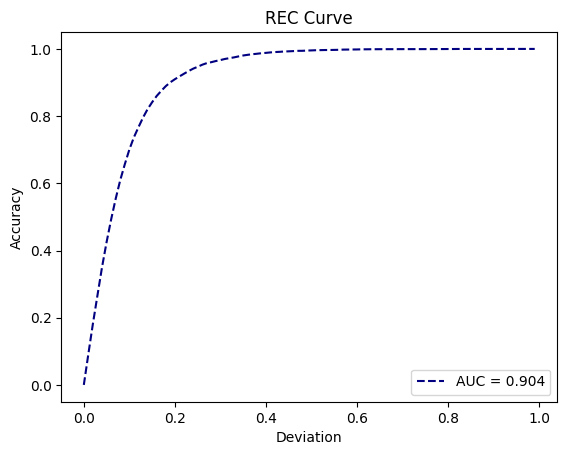

In [60]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

def calculate_rec_curve(y_true, y_pred):
    begin = 0.0
    end = 1.0
    interval = 0.01
    accuracy = []
    deviation = np.arange(begin, end, interval)

    norms = np.abs(y_true - y_pred) / np.sqrt(y_true**2 + y_pred**2)

    for dev in deviation:
        count = np.sum(norms < dev)
        accuracy.append(count / len(y_true))

    auc_rec = integrate.simps(accuracy, deviation) / end

    return deviation, accuracy, auc_rec

# Seus dados reais (y_test) e previstos (predictions)
y_test = true_labels_column['True Labels']
predictions = predictions_column['Predictions']

# Calcula a curva REC
deviation, accuracy, auc_rec = calculate_rec_curve(predictions,y_test)

# Plota a curva REC
plt.plot(deviation, accuracy, color="navy", linestyle="--", label=f"AUC = {auc_rec:.3f}")
plt.xlabel("Deviation")
plt.ylabel("Accuracy")
plt.title("REC Curve")
plt.legend()
plt.show()
